In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras_tqdm import TQDMNotebookCallback
from npm3dGenerator import NPM3DGenerator
from models import build_point_net
import utils_training as u_t

Using TensorFlow backend.


In [6]:
training_dataset = NPM3DGenerator(paths_to_keep = [1, 2])
validation_dataset = NPM3DGenerator(paths_to_keep = [0])

In [8]:
miou_metric = u_t.mIoU(training_dataset.n_classes)

model = build_point_net(input_shape = (training_dataset.n_points, training_dataset.n_channels),
                        output_shape = training_dataset.n_classes)
model.compile("adadelta", u_t.my_categorical_crossentropy, metrics = ["accuracy", miou_metric.miou])
#model.summary()

In [9]:
history = model.fit_generator(training_dataset, epochs = 10,
                              validation_data = validation_dataset,
                              class_weight = training_dataset.class_weight,
                              verbose = 0, callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)])
u_t.plot_history(history)

NameError: name 'plt' is not defined

In [10]:
from utils import save_model
save_model(model, "trained")

Saved model to disk


(array([1332998.,       0., 1376773.,       0.,       0.,       0.,
              0.,       0.,   32963.,  336453.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

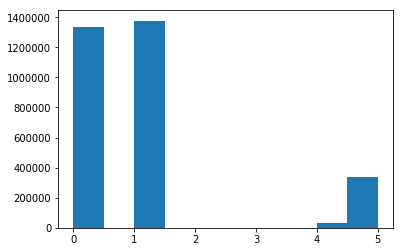

In [13]:
test_dataset = NPM3DGenerator(input_dir = "../Benchmark_MVA/test", train = False)
predictions = test_dataset.predict_point_cloud(model)
plt.hist(np.argmax(predictions, axis = -1))